# **Import Required Libraries**

---



In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 28.5 MB/s 
     |████████████████████████████████| 163 kB 71.0 MB/s 
     |████████████████████████████████| 7.6 MB 55.0 MB/s 


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 31.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=02378c89e81fe9aafbc78528a12941704f5520700f4c5117308fc6a34718baba
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [2]:
import matplotlib
matplotlib.__version__ 

'3.5.3'

In [4]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 8.7 MB/s 
     |████████████████████████████████| 965 kB 46.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 432x288 with 0 Axes>

# **Import Data Sets**

---



In [7]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
trainData = pd.read_csv('/content/gdrive/MyDrive/CS-688_Project/Twitter/Twitter_Corona_NLP_train.csv',encoding='ISO-8859-1')
testData = pd.read_csv('/content/gdrive/MyDrive/CS-688_Project/Twitter/Twitter_Corona_NLP_test.csv')
trainData.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
testData.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [10]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [11]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [12]:
#converting date to datetime format
trainData['TweetAt'] = pd.to_datetime(trainData['TweetAt'])

In [13]:
#dropping the duplicate tweets if any.
trainData.drop_duplicates(subset='OriginalTweet',inplace=True)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.2+ MB


In [14]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

# **Tweets Cleaning and Pre-processing**

---




In [15]:
trainData = trainData[['OriginalTweet','Sentiment']]

In [16]:
trainData.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [17]:
testData = testData[['OriginalTweet','Sentiment']]
testData.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


**Tweets Pre-Processing**

In [18]:
#testing the code for removing emojis
text = u'Hi, I am fine. 😁 😁 😁'
print(text) # with emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(text))

Hi, I am fine. 😁 😁 😁
Hi, I am fine.   


In [19]:
#Clean emojis from text
def strip_emoji(text):
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  return regrex_pattern.sub(r'',text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#Remove hashtags
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Remove special characters
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [20]:
#cleaning the tweets for training data.
tweetsNew = []
for t in trainData.OriginalTweet:
    tweetsNew.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

#cleaning the tweets for testing data.
tweetsNewTest = []
for t in testData.OriginalTweet:
    tweetsNewTest.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [21]:
#updating the cleaned tweets in the dataframe as a new column
trainData['tweetsClean'] = tweetsNew
testData['tweetsClean'] = tweetsNewTest

In [22]:
trainData.head()

,OriginalTweet,Sentiment,tweetsClean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...


In [23]:
testData.head()

,OriginalTweet,Sentiment,tweetsClean
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldnt find hand sanitizer at fred mey...
2,Find out how you can protect yourself and love...,Extremely Positive,find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


Checking if tweets cleaning reduced the length of the tweets by a large margin and dropping such tweets.

In [24]:
tweetsLength = []
for tweets in trainData.tweetsClean:
    tweet_len = len(tweets.split())
    tweetsLength.append(tweet_len)

In [25]:
trainData['textLen'] = tweetsLength
trainData.head()

,OriginalTweet,Sentiment,tweetsClean,textLen
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,2
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...,39


In [26]:
tweetsLengthTest = []
for tweet in testData.tweetsClean:
    tweet_len = len(tweet.split())
    tweetsLengthTest.append(tweet_len)
    
testData['textLen'] = tweetsLengthTest
testData.head()

,OriginalTweet,Sentiment,tweetsClean,textLen
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trending new yorkers encounter empty supermark...,21
1,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldnt find hand sanitizer at fred mey...,29
2,Find out how you can protect yourself and love...,Extremely Positive,find out how you can protect yourself and love...,12
3,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,35
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,25


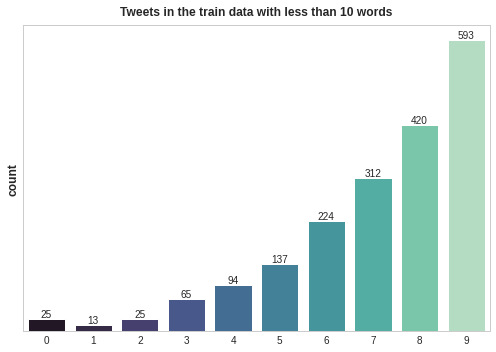

In [27]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='textLen', data=trainData[trainData['textLen']<10], palette='mako')
plt.title('Tweets in the train data with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

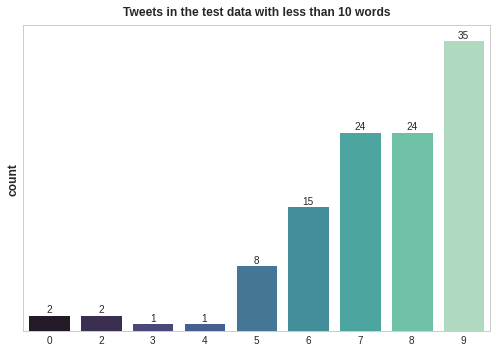

In [28]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='textLen', data=testData[testData['textLen']<10], palette='mako')
plt.title('Tweets in the test data with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [29]:
trainData = trainData[trainData['textLen'] > 4]

In [30]:
testData = testData[testData['textLen'] > 4]

In [31]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
token_lens = []

for txt in trainData['tweetsClean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [33]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 100


Checking the long tokenized sentences (with more than 80 tokens ):

In [34]:
token_lens = []

for i,txt in enumerate(trainData['tweetsClean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")  

INDEX: 1622, TEXT: zsah policie proti spekulantm s roukami na mj popud hejtman steckho kraje ve spoluprci s podle krizovho zkona zajistil tm 700 tisrouek od firmy kter je mla dodat na zdravotnkm ale na posledn chvli se snaila navyovat cenu spolutozvladneme
INDEX: 13623, TEXT: hoy aplaudo a mi segunda familia aplaudoanuestrosheroes aquellos con los que he compartido tantas noches de trabajo y tanta alegra s que como siempre dan todo por el bien de su comunidad presidente por ellos tambin cuarentenanacionalya cuidemosalosquecuidan
INDEX: 16548, TEXT: bir mddettir spermarketlerin lojistik hizmeti avusturya ordusu desteiyle yaplyor dn corona tedavisi iin 22 milyon luk bir aratrma gelitirme btesi aklad hkmet geen hafta da 35 milyon luk 2 yardm paketi aklanmt viyanadan haberler bu kadar
INDEX: 36953, TEXT: 11 nisan cumartesi itibariyle bbnin tm hizmetleri sokaa kma serbestisi olanlar iin devam edecek halk ekmek ve hamidiye su 100 retime geti bb tm stanbulun gda ihtiyacna yetecek kapasitededi

In [35]:
trainData['tokenLen'] = token_lens

In [36]:
trainData = trainData.sort_values(by='tokenLen', ascending=False)
trainData.head(20)

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
1638,ZÃ¡sah policie proti spekulant?m s rouÂkami. ...,Neutral,zsah policie proti spekulantm s roukami na mj ...,39,100
37156,11 Nisan Cumartesi itibariyle ?BBÂnin tÃ¼m hi...,Neutral,11 nisan cumartesi itibariyle bbnin tm hizmetl...,39,98
16632,Bir mÃ¼ddettir sÃ¼permarketlerin lojistik hizm...,Neutral,bir mddettir spermarketlerin lojistik hizmeti ...,36,92
13691,Hoy aplaudo a mi segunda familia #AplaudoANues...,Neutral,hoy aplaudo a mi segunda familia aplaudoanuest...,38,84
27005,Supermercados Econo confirman que un empleado ...,Neutral,supermercados econo confirman que un empleado ...,39,80
14593,"Na, wer war denn da am Werk? Gestern Nachmitta...",Extremely Negative,na wer war denn da am werk gestern nachmittag ...,37,80
28899,Kindly contact Us bamy global merchandise for ...,Positive,kindly contact us bamy global merchandise for ...,37,80
11213,Keine WertgegenstÃ¤nde im Fahrzeug lassen! - D...,Negative,keine wertgegenstnde im fahrzeug lassen diesen...,33,79
4844,Impct of #coronavirus i hve sen hw civilizd pp...,Extremely Negative,impct of coronavirus i hve sen hw civilizd ppl...,48,79
18913,#CroozefmNews \r\r\nPresident Museveni has ord...,Extremely Negative,croozefmnews president museveni has ordered th...,35,79


In [37]:
trainData = trainData.iloc[12:]
trainData.head()

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
12389,"Okay, so I just checked the drug prices for #P...",Positive,okay so i just checked the drug prices for pla...,35,77
1697,I work at a grocery store.\r\r\nWe wont get an...,Positive,i work at a grocery store we wont get any toil...,37,77
8730,?Bitte anschauen! (1/2)\r\r\n\r\r\nEmotionaler...,Negative,bitte anschauen 12 emotionaler aufruf von geha...,36,77
14582,hiked prices in the face of the Covid-19 crise...,Negative,hiked prices in the face of the covid19 crises...,47,77
36305,Sterile disposable anti bacterial wet wipes an...,Negative,sterile disposable anti bacterial wet wipes an...,31,76


In [38]:
trainData = trainData.sample(frac=1).reset_index(drop=True)
trainData

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
0,A weird consequence of the #coronavirus pandem...,Negative,a weird consequence of the coronavirus pandemi...,20,26
1,As 19 economic impacts evolve is now easing th...,Negative,as 19 economic impacts evolve is now easing th...,29,32
2,A prolonged truncation of consumer demand due ...,Negative,a prolonged truncation of consumer demand due ...,21,28
3,#BigStory | How #Covid-19 changes the outlook ...,Neutral,bigstory how covid19 changes the outlook for e...,12,24
4,Just got home from the supermarket. Panic buyi...,Negative,just got home from the supermarket panic buyin...,30,38
...,...,...,...,...,...
40918,NEW PRICE LIST NEW METHODS NO NONSENSE Check o...,Extremely Negative,new price list new methods no nonsense check o...,16,18
40919,The decision to increase DStv prices in April ...,Extremely Positive,the decision to increase dstv prices in april ...,16,22
40920,What Shoppers Buying Online During #COVID19: T...,Negative,what shoppers buying online during covid19 the...,35,47
40921,@RichardDawkins I believe that you are in far ...,Extremely Negative,i believe that you are in far more danger of e...,34,38


## Cleaning the test data

In [39]:
tokenLenTest = []

for txt in testData['tweetsClean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    tokenLenTest.append(len(tokens))
    
max_len=np.max(tokenLenTest)

In [40]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 96


In [41]:
tokenLenTest = []

for i,txt in enumerate(testData['tweetsClean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    tokenLenTest.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 286, TEXT: so hard to decide as much as i want to hodl my 2 ccdcv4 token our place is declared to lock down due to covid19 i will use this to buy some food to stock txnid093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f my b
INDEX: 345, TEXT: informoval jsem zstupce vech obchodnch etzc o aktulnch opatench vldy etzce jsou zsobovny na 95 take nen dvod panikait zsoby potravin fakt nedojdou nen opravdu dvod dnes obsadit a vykoupit supermarkety
INDEX: 2380, TEXT: ahora seguid llorando por el papel higinico que no he comprado porque an tengo seguid creando histeria y preocupacin poniendo fotos de gente en pnico y estanteras vacas que yo seguir yendo a comercios responsables de barrio donde nos cuidan hoy y siempre gracias


In [42]:
testData['tokenLen'] = tokenLenTest

In [43]:
testData = testData.sort_values(by='tokenLen', ascending=False)
testData

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
286,@Rhett800cc So hard to decide??. As much as I ...,Negative,so hard to decide as much as i want to hodl my...,38,96
2383,Ahora seguid llorando por el papel higiénico (...,Negative,ahora seguid llorando por el papel higinico qu...,44,94
345,Informoval jsem zástupce vech obchodních ?et?...,Neutral,informoval jsem zstupce vech obchodnch etzc o ...,31,86
1485,DTF-Dont Touch Face\r\r\nDWBH-Do Wash Both Ha...,Extremely Negative,dtfdont touch face dwbhdo wash both hands gtfo...,42,77
1209,Im in the DC/Maryland/Virginia (DMV) area &am...,Positive,im in the dcmarylandvirginia dmv area amphave ...,45,74
...,...,...,...,...,...
989,My local grocery store #Covid_19 https://t.co/...,Neutral,my local grocery store covid19,5,9
2972,How Chicago prepared for da virus,Positive,how chicago prepared for da virus,6,8
2748,Hey @JCROX88 saw this. Thought of you. ? https...,Neutral,hey saw this thought of you,6,8
1781,Stay Safe &amp; Be Prepared!!! https://t.co/zp...,Positive,stay safe amp be prepared,5,7


In [44]:
testData = testData.iloc[5:]
testData

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
3505,Stop misusing ur privilege amp grow up Some1 c...,Positive,stop misusing ur privilege amp grow up some1 c...,57,73
1789,"For those that are cashlong, patient,calm&amp;...",Extremely Positive,for those that are cashlong patientcalmamphave...,44,71
855,"Lidl is total chaos, queues as long as the ais...",Extremely Negative,lidl is total chaos queues as long as the aisl...,62,70
2740,COVID-19: Your government will save ITSELF not...,Positive,covid19 your government will save itself not y...,43,70
2997,Stop #frenzybuying. You don't need most of wha...,Extremely Negative,stop frenzybuying you dont need most of what y...,38,70
...,...,...,...,...,...
989,My local grocery store #Covid_19 https://t.co/...,Neutral,my local grocery store covid19,5,9
2972,How Chicago prepared for da virus,Positive,how chicago prepared for da virus,6,8
2748,Hey @JCROX88 saw this. Thought of you. ? https...,Neutral,hey saw this thought of you,6,8
1781,Stay Safe &amp; Be Prepared!!! https://t.co/zp...,Positive,stay safe amp be prepared,5,7


In [45]:
testData = testData.sample(frac=1).reset_index(drop=True)
testData.head()

,OriginalTweet,Sentiment,tweetsClean,textLen,tokenLen
0,Online shopping getting new records? #coronavirus,Neutral,online shopping getting new records coronavirus,6,9
1,You can be as rational as can be about #corona...,Extremely Negative,you can be as rational as can be about coronav...,47,57
2,Its not #Covid_19 that should be blamed for e...,Extremely Negative,its not covid19 that should be blamed for empt...,41,47
3,Corona virus got people going nuts at the groc...,Negative,corona virus got people going nuts at the groc...,46,54
4,"So,, I literally only have 2 rolls of toilet p...",Extremely Negative,so i literally only have 2 rolls of toilet pap...,31,40


# **Sentiment column analysis**

---



In [46]:
trainData['Sentiment'].value_counts()

Positive              11381
Negative               9889
Neutral                7560
Extremely Positive     6618
Extremely Negative     5475
Name: Sentiment, dtype: int64

In [47]:
# encoding the sentiments to integers for better analysis
trainData['Sentiment'] = trainData['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})
testData['Sentiment'] = testData['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [48]:
print("train data: ",trainData['Sentiment'].value_counts())
print("\n\ntest data: ",testData['Sentiment'].value_counts())

train data:  2    17999
0    15364
1     7560
Name: Sentiment, dtype: int64


test data:  0    1629
2    1544
1     614
Name: Sentiment, dtype: int64


**Class Balancing by RandomOverSampler**

---



In [49]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(trainData['tweetsClean']).reshape(-1, 1), np.array(trainData['Sentiment']).reshape(-1, 1));
trainOverSampled = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['tweetsClean', 'Sentiment']);

In [50]:
trainOverSampled['Sentiment'].value_counts()

0    17999
1    17999
2    17999
Name: Sentiment, dtype: int64

In [51]:
X = trainOverSampled['tweetsClean'].values
y = trainOverSampled['Sentiment'].values

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=27)

In [53]:
X_test = testData['tweetsClean'].values
y_test = testData['Sentiment'].values

**One hot encoding**

---



In [54]:
y_trainOHE = y_train.copy()
y_valOHE = y_val.copy()
y_testOHE = y_test.copy()

In [55]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [56]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_val.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 48597
VALIDATION DATA: 5400
TESTING DATA: 3787


# **BERT Sentiment Analysis**

---

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
  input_ids = []
  attention_masks = []
  for i in range(len(data)):
    encoded = tokenizer.encode_plus(data[i], add_special_tokens=True, max_length=MAX_LEN, padding='max_length', return_attention_mask=True)
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
bertModel = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()


input_ids = tf.keras.Input(shape=(MAX_LEN,),dtype='int32')

attention_masks = tf.keras.Input(shape=(MAX_LEN,),dtype='int32')

embeddings = bertModel([input_ids,attention_masks])[1]

output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

model.compile(opt, loss=loss, metrics=accuracy)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
modelTrain = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1519/1519 [==============================] - 1237s 804ms/step - loss: 0.5572 - categorical_accuracy: 0.7776 - val_loss: 0.3495 - val_categorical_accuracy: 0.8750
Epoch 2/4
1519/1519 [==============================] - 1217s 802ms/step - loss: 0.2888 - categorical_accuracy: 0.8984 - val_loss: 0.2575 - val_categorical_accuracy: 0.9115
Epoch 3/4
1519/1519 [==============================] - 1218s 802ms/step - loss: 0.1922 - categorical_accuracy: 0.9339 - val_loss: 0.2130 - val_categorical_accuracy: 0.9304
Epoch 4/4
1519/1519 [==============================] - 1217s 801ms/step - loss: 0.1282 - categorical_accuracy: 0.9570 - val_loss: 0.1925 - val_categorical_accuracy: 0.9409


In [ ]:
resultBert = model.predict([test_input_ids,test_attention_masks])

119/119 [==============================] - 36s 279ms/step


In [ ]:
y_predBert =  np.zeros_like(resultBert)
y_predBert[np.arange(len(y_predBert)), resultBert.argmax(1)] = 1

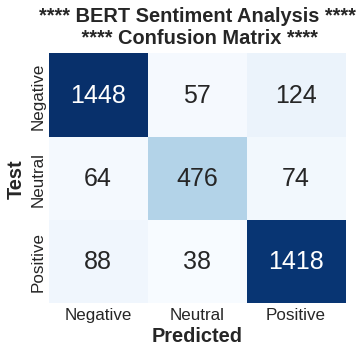

In [ ]:
conf_matrix(y_test.argmax(1), y_predBert.argmax(1),'**** BERT Sentiment Analysis ****\n **** Confusion Matrix ****')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_predBert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      1629
     Neutral       0.83      0.78      0.80       614
    Positive       0.88      0.92      0.90      1544

   micro avg       0.88      0.88      0.88      3787
   macro avg       0.87      0.86      0.87      3787
weighted avg       0.88      0.88      0.88      3787
 samples avg       0.88      0.88      0.88      3787



In [ ]:
print("Accuracy for BERT on twitter dataset:", accuracy_score(y_test,y_predBert))

Accuracy for BERT on twitter dataset: 0.8824927383152892


# **RoBERTa Sentiment Analysis**

---



In [57]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [58]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

89

In [59]:
MAX_LEN=128

In [60]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [62]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

In [65]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [67]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()

input_ids = tf.keras.Input(shape=(MAX_LEN,),dtype='int32')
attention_masks = tf.keras.Input(shape=(MAX_LEN,),dtype='int32')
output = roberta_model([input_ids,attention_masks])
output = output[1]
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)
model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
model.compile(opt, loss=loss, metrics=accuracy)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 el)                            thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [68]:
robertaTrained = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=30)

Epoch 1/4
1620/1620 [==============================] - 1281s 781ms/step - loss: 0.5722 - categorical_accuracy: 0.7703 - val_loss: 0.3745 - val_categorical_accuracy: 0.8726
Epoch 2/4
1620/1620 [==============================] - 1223s 755ms/step - loss: 0.3338 - categorical_accuracy: 0.8789 - val_loss: 0.3073 - val_categorical_accuracy: 0.8957
Epoch 3/4
1620/1620 [==============================] - 1263s 780ms/step - loss: 0.2524 - categorical_accuracy: 0.9105 - val_loss: 0.2538 - val_categorical_accuracy: 0.9128
Epoch 4/4
1620/1620 [==============================] - 1264s 780ms/step - loss: 0.1983 - categorical_accuracy: 0.9314 - val_loss: 0.2432 - val_categorical_accuracy: 0.9196


In [69]:
resultRoberta = model.predict([test_input_ids,test_attention_masks])

119/119 [==============================] - 34s 258ms/step


In [70]:
y_predRoberta =  np.zeros_like(resultRoberta)
y_predRoberta[np.arange(len(y_predRoberta)), resultRoberta.argmax(1)] = 1

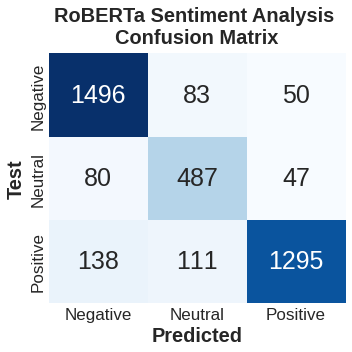

In [71]:
conf_matrix(y_test.argmax(1),y_predRoberta.argmax(1),'RoBERTa Sentiment Analysis \nConfusion Matrix')

In [72]:
print('\tClassification Report for RoBERTa:\n\n',classification_report(y_test,y_predRoberta, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.87      0.92      0.90      1629
     Neutral       0.72      0.79      0.75       614
    Positive       0.93      0.84      0.88      1544

   micro avg       0.87      0.87      0.87      3787
   macro avg       0.84      0.85      0.84      3787
weighted avg       0.87      0.87      0.87      3787
 samples avg       0.87      0.87      0.87      3787



In [73]:
print("Accuracy for RoBERTa on twitter dataset:", accuracy_score(y_test,y_predRoberta))

Accuracy for RoBERTa on twitter dataset: 0.8655928175336678
